#### [ 미니 테스트  2024-03-14 ]<hr>

[1] 지도학습에 대한 설명과 종류에 대해서 간략하게 설명해 주세요.

- 지도학습은 기본적으로 미리 피쳐(들)과 타켓이 정해져 있음(지도됨)
- 만약 타켓이 범주형일 경우 분류형, 연속형일 경우 회귀형 모델을 사용함
- 기본적으로 지도학습의 경우 훈련용 데이터셋과 검증용, 테스트용 데이트셋을 나누어 훈련후 검증용과 테스트용 셋으로 모델을 평가함
- 선형 회귀, 확률적 경사 하강법, 로지스틱회귀, KNN, SVM(SVC, SVR), 의사결정트리, 랜덤포레스트 등 앙상볼 모델
- 만약 여러 모델을 사용할 경우 voting 모델, boosting, bagging 등을 사용함


[2] 지도학습의 학습 프로세스를 간략하게 설명해 주세요.

- 데이터 전처리
- 원하는 타켓 선정 및 피쳐(들) 선정
- 훈련용, 테스트용, 검증용(선택) 데이터셋으로 분리
- 여러 모델들 중 가장 성능이 우수한 알고리즘 선정


[3] 선형회귀 대해 간략하게 설명해주세요.  
    - 개념  
    - 조건  
    - 동작원리  
    - 선형식  
    - 오차/잔차 계산 방법  

- 연속형 타켓과 피쳐 사이의 관계를 직선으로 나타내는 것
- 각 피쳐들 사이에서는 독립성이 유지되어야 함, 피쳐들과 타켓간에 상관관계가 성립이 되어야 함
- 선과 (피쳐, 타켓) 점 사이의 거리가 최소화 되는 선을 찾는 방식
- $ f(x) = w_1x + w_2x + ... + w_nx + b $
- MAE(직선과 점들간의 거리의 절대값 합을 갯수로 나눈 평균)
- (R)MSE (직선과 점들간의 거리의 제곱의 합($ sqrt(MSE) $) 을 갯수로 나눈 평균), $ R^2 $ 등

[4] 로지스틱회귀 대해 간략하게 설명해주세요.  
   - 개념  
   - 조건  
   - 동작원리  
   - 선형식  
   - 오차/잔차 계산 방법  

 - 로지스틱회귀는 회귀 모델을 사용하나 시그모이드 함수를 후처리로 사용하는 분류 모델
 - 기본적으로 데이터셋에서 피쳐(들)과 타켓의 상관관계가 명확해야함
 - 시그모이드 함수에 의해 0.5 를 기준으로 타켓의 성립 여부를 결정
 - 만약 타켓의 갯수가 3개 이상인 경우 OVR, OVO 등으로 문제를 분할하여 로지스틱회귀 문제 해결 가능
 - ??
 - 

[5] Fashion MNIST 데이터셋에서 10개 카테고리 중 하나를 선택해서 2진 분류로 구현해 주세요.  
- 데이터셋 : scikit-learn의 datasets 사용
    - from sklearn.datasets import fetch_openml 
    - db_name = 'Fashion-MNIST'
    - fashion_data = fetch_openml(name=db_name, parser='auto')

### (1) 모듈 로딩 및 데이터 준비
<hr>

- scikit-learn 에서 데이터 다운 및 확인

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import torch
import torch.nn as nn               # LinearRegression 기능의 클래스 Linear
import torch.optim as optim         # 최적화 (경사하강법)
import torch.nn.functional as F     # 손실함수 로딩



#### (1-1) 데이터 준비

In [3]:

db_name = 'Fashion-MNIST'
X, y = fetch_openml(name=db_name, parser='auto', as_frame=False, return_X_y=True)


In [86]:
if torch.cuda.is_available():
    DEVICE = 'cuda'
else:
    DEVICE = 'cpu'

#### (1-2) 데이터 갯수 확인

In [4]:
X_reshaped = X

In [5]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
y_onehot = onehot.fit_transform(y.reshape(-1, 1)).toarray()

### (2) 데이터 가공 및 전처리 
<hr>

- 결측치/중복/이상치 = > 없음
- 다중분류 ==> 이진분류 변환 : target 변환
- 정규화 => 피쳐 정규화, 타켓 정규화
- 표준화 => 이미지 동일 크기 및 색상 채널 : 동일 크기와 채널 (흑백 1)


#### (2-1) 다중분류 ==> 이진분류 변환 : target 변환

In [6]:
# target = target == '0'
# target.unique()


#### (2-2) 정규화 => 피쳐 : 784 픽셀의 색상값 


In [7]:
# norm_feature = feature  / 255.

#### (2-3) OneHotEncoding => 타켓 : 2개 카테고리


In [8]:
# pd.get_dummies(df['class']).values
# from sklearn.preprocessing import OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False) # sparse 옵션을 통해 transform 후 풀어서 값을 받음
# onehot_encoder.fit_transform(df['class'].values.reshape(-1, 1))


# F.one_hot(torch.tensor(df['class'].values.astype(np.uint8), dtype=torch.int64), num_classes=10) #onehotencoder 사용시 dtype == int64


- 데이터 ===> 숫자변환
- 글자 =====> 라벨인코더 ====> OneHotEncoder =====> 밀집행렬 (임베딩)

### (3) 학습 준비
<hr>

- 텐서화 
- 데이터셋 준비: 훈련용 테스트용
- 학습방법 : 지도학습 - 이진분류 => Linear 클래스 + Sigmoid 함수
- 최적화방법 : 경사하강법기반의 방법 => Adam, SGD, ....
- 손실함수 : 이진분류 손실 계산 함수 (binary_cross_entropy)

- 주의: 만약 일반 회귀  모형인 경우에는 int64, 원핫코드의 경우에는 float64 형태로 전달해주어야 함

#### (3-1) 데이터셋 준비 : 60000개 훈련, 10000개 테스트


In [9]:
from sklearn.model_selection import train_test_split
# 
# X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_onehot, test_size=0.2, random_state=42, stratify=y_onehot)

X_train = X_reshaped[:60000]
X_test = X_reshaped[60000:]
y_train = y_onehot[:60000]
y_test = y_onehot[60000:]



In [10]:
Xt_train = torch.tensor(X_train, dtype=torch.float32)
yt_train = torch.tensor(y_train.astype(np.uint8), dtype=torch.float64)
Xt_train.shape, yt_train.shape

(torch.Size([60000, 784]), torch.Size([60000, 10]))

In [11]:
Xt_test = torch.tensor(X_test, dtype=torch.float32)
yt_test = torch.tensor(y_test.astype(np.uint8), dtype=torch.float64)

In [12]:
# yt_hot_train = F.one_hot(yt_train, num_classes=10).to(torch.float32)

yt_hot_train = yt_train # 이미 원핫 처리 완료됨


In [13]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [95]:
model = nn.Sequential(
    # nn.Conv2d(1, 10, kernel_size=5),
    # nn.MaxPool2d(2),
    # nn.ReLU(),
    # nn.Conv2d(10, 20, kernel_size=5),
    # nn.Dropout2d(),
    # nn.MaxPool2d(2),
    # nn.ReLU(),
    # nn.Flatten(),
    # nn.Linear(784, 100),
    # nn.ReLU(),
    # nn.Dropout(),
    # nn.Linear(100, 10),
    # nn.Softmax(dim=1),
    nn.Linear(784, 100),
    nn.ReLU(),
    nn.Tanh(),
    nn.Linear(100, 10),
    # nn.Softmax(dim=1),
)

# 최적화 인스턴스 생성 => 모델에서 사용하는 W, b변수들을 전달함
optimizar = optim.Adam(model.parameters(), lr=0.001)

criterion = F.cross_entropy

try:
    import intel_extension_for_pytorch as ipex
    model, optimizar = ipex.optimize(model, optimizer=optimizar, auto_kernel_selection=True)
except:
    print("No Intel Extension for Pytorch found, if you want to use IPEX, please install it.")
    pass
model

Sequential(
  (0): _IPEXLinear()
  (1): ReLU()
  (2): Tanh()
  (3): _IPEXLinear()
)

In [96]:
for x in model.parameters():
    print(x.shape)

torch.Size([2, 49, 16, 64])
torch.Size([100])
torch.Size([0])
torch.Size([0])
torch.Size([1, 7, 16, 16])
torch.Size([10])
torch.Size([0])
torch.Size([0])


### (4) 학습
<hr>

- 반복횟수 만큼 학습 진행


In [ ]:
### 학습 횟수 => 샘플 처음부터 끝까지 읽는 것 기준으로 횟수 지정
epochs = 100
result_loss_accuracy = [[],[]]


In [104]:
epochs = 1000
for epoch in range(epochs+1):
    # 예측
    y_pred = model(Xt_train)
    
    # 오차 계산
    loss = criterion(y_pred, yt_hot_train)
    result_loss_accuracy[0].append(loss.item())
    
    # 이후 W, b를 업데이트
    optimizar.zero_grad()
    loss.backward()  #손실함수 계산법으로 미분 진행하여 새로운 W, b 계산
    optimizar.step()

    #정확도 계산 => 예측값을 0과 1로 변환 ==> 정답과 비교
    result = (y_pred.max(dim=1)[1] == yt_hot_train.max(dim=1)[1]).sum() / yt_hot_train.shape[0]
    # result = (y_train == (y_pred >= 0.5)).sum() / yt_train.shape[0]
    result_loss_accuracy[1].append(result.item())
    
    if epoch % 1 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")


Epoch: 0, Loss: 0.5506928394035747
Epoch: 1, Loss: 0.5479668770869573
Epoch: 2, Loss: 0.5450844264362007
Epoch: 3, Loss: 0.5441957785264899
Epoch: 4, Loss: 0.5401650432833781
Epoch: 5, Loss: 0.5371968574610849
Epoch: 6, Loss: 0.5345857197135687
Epoch: 7, Loss: 0.532460981292526
Epoch: 8, Loss: 0.529807521707192
Epoch: 9, Loss: 0.5271193511387954
Epoch: 10, Loss: 0.5229460122504582
Epoch: 11, Loss: 0.5228904963618766
Epoch: 12, Loss: 0.5218269139586638
Epoch: 13, Loss: 0.5188751131468763
Epoch: 14, Loss: 0.5151600221446405
Epoch: 15, Loss: 0.5126899886631717
Epoch: 16, Loss: 0.5119860441540057
Epoch: 17, Loss: 0.5110895473992452
Epoch: 18, Loss: 0.5080242144155627
Epoch: 19, Loss: 0.5062679156960299
Epoch: 20, Loss: 0.5036023029569536
Epoch: 21, Loss: 0.5012904144295802
Epoch: 22, Loss: 0.49983425583268204
Epoch: 23, Loss: 0.49719647393481187
Epoch: 24, Loss: 0.4955929287140568
Epoch: 25, Loss: 0.49314652534071357
Epoch: 26, Loss: 0.49128008481947083
Epoch: 27, Loss: 0.49065539053988955

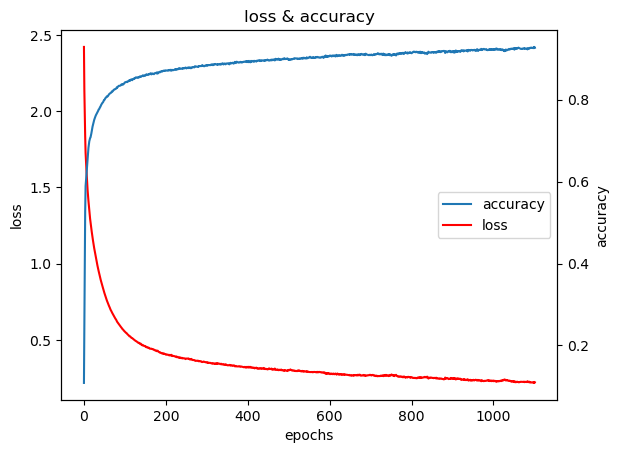

In [105]:
## 손실과 정확도 시각화
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(result_loss_accuracy[0], label='loss', color='red')
ax1 = ax.twinx()
ax1.plot(result_loss_accuracy[1], label='accuracy')
# twin axis
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc=5)

ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax1.set_ylabel('accuracy')
plt.title('loss & accuracy')
plt.show()

In [107]:
yt_test_pred = model(Xt_test)
yt_test_hot = yt_test
result = yt_test_pred.max(dim=1)[1] == yt_test_hot.max(dim=1)[1]
result = yt_test_pred.argmax(dim=1) == yt_test_hot.argmax(dim=1)


In [108]:
(result.sum() / result.shape[0] ).item(), result.shape[0]

(0.8672000169754028, 10000)

In [103]:
SAVE = False
torch.save(model.state_dict(), 'model.pth') if SAVE else ""

''

In [110]:
[x.size() for x in model.parameters()]


[torch.Size([2, 49, 16, 64]),
 torch.Size([100]),
 torch.Size([0]),
 torch.Size([0]),
 torch.Size([1, 7, 16, 16]),
 torch.Size([10]),
 torch.Size([0]),
 torch.Size([0])]